In [ ]:
# In your terminal or Jupyter notebook, run:
!pip install tensorflow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.4 MB/s eta 0:00:000m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 132.1 kB/s eta 0:00:0036m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 664.9 kB/s eta 0:00:001m47.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 5.4 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.0 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 9.9 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 12.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.3 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 827.2 kB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import os
os.listdir("Downloads/Vision")


['mnist_test.csv', 'mnist_train.csv']

In [3]:
import pandas as pd
import numpy as np

# Load training and test CSV files
train_df = pd.read_csv("Downloads/Vision/mnist_train.csv")
test_df = pd.read_csv("Downloads/Vision/mnist_test.csv")

# Separate labels and images
y_train = train_df['label'].values
X_train = train_df.drop('label', axis=1).values.reshape(-1,28,28)

y_test = test_df['label'].values
X_test = test_df.drop('label', axis=1).values.reshape(-1,28,28)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


Visualize Random Images

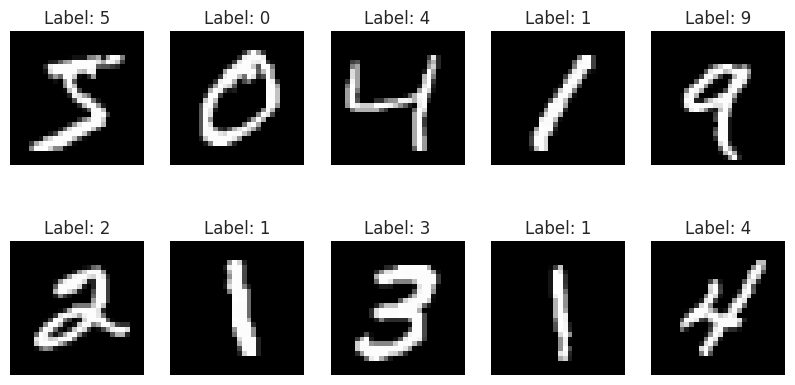

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Display 10 random images from the training set
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')  # Grayscale image
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


Check class Distribution

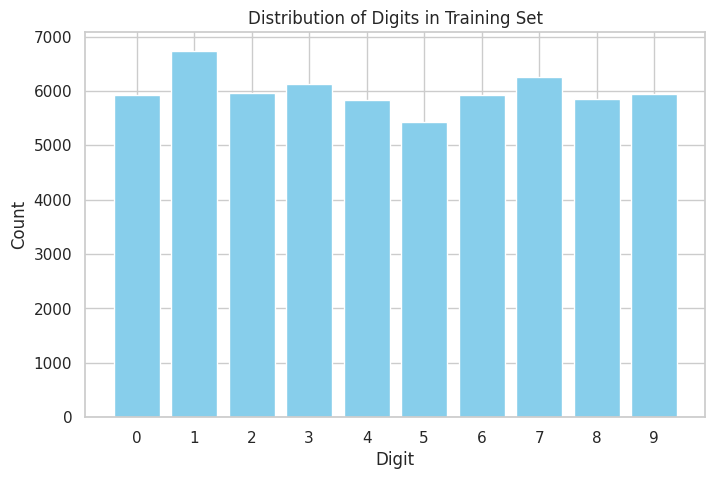

Counts per digit: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Count how many of each digit
counts = np.bincount(y_train)  # y_train contains integers 0-9
digits = np.arange(10)

# Plot with matplotlib
plt.figure(figsize=(8,5))
plt.bar(digits, counts, color='skyblue')
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Distribution of Digits in Training Set")
plt.xticks(digits)
plt.show()

print("Counts per digit:", counts)


Image properties and statistics

In [10]:
# Image properties
print("Example image shape:", X_train[0].shape)
print("Pixel value range:", X_train.min(), "to", X_train.max())
print("Mean pixel intensity:", np.mean(X_train))
print("Standard deviation of pixel intensities:", np.std(X_train))


Example image shape: (28, 28)
Pixel value range: 0 to 255
Mean pixel intensity: 33.318421449829934
Standard deviation of pixel intensities: 78.56748998339742


Check random images for noise

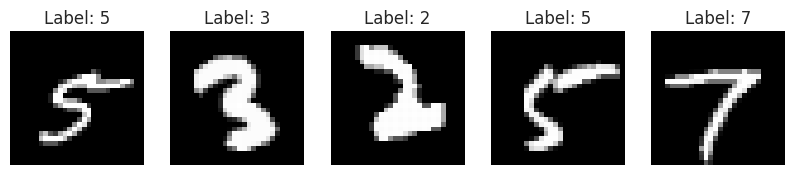

In [11]:
# Randomly pick 5 images to inspect
indices = np.random.choice(len(X_train), 5, replace=False)

plt.figure(figsize=(10,2))
for i, idx in enumerate(indices):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')
plt.show()


Check shape and format

In [12]:
# Check all image shapes
unique_shapes = set([img.shape for img in X_train])
print("Unique image shapes in training set:", unique_shapes)


Unique image shapes in training set: {(28, 28)}


Preprocessing

Normalize Pixel Values

Current pixel range: 0–255

Neural networks (and some ML models) work better if inputs are scaled to 0–1.

In [13]:
# Normalize images to 0-1
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Check min and max
print("Min pixel value after normalization:", X_train_norm.min())
print("Max pixel value after normalization:", X_train_norm.max())


Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0


Reshape images for Models


Traditional ML models (Logistic Regression, KNN, SVM): need 1D arrays (784 features).

Neural networks / CNNs: can use 2D arrays with a channel (28x28x1)

In [14]:
# Flatten images for traditional ML models
X_train_flat = X_train_norm.reshape(-1, 28*28)
X_test_flat = X_test_norm.reshape(-1, 28*28)

# For CNN: add channel dimension
X_train_cnn = X_train_norm.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_norm.reshape(-1, 28, 28, 1)

print("Flattened shape for ML models:", X_train_flat.shape)
print("CNN input shape:", X_train_cnn.shape)


Flattened shape for ML models: (60000, 784)
CNN input shape: (60000, 28, 28, 1)


Train-Test Split

MNIST already comes split:

Training: 60,000 samples

Test: 10,000 samples

Optional: split part of training set into a validation set for neural networks.

In [15]:
from sklearn.model_selection import train_test_split

# 10% of training set for validation
X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(
    X_train_flat, y_train, test_size=0.1, random_state=42
)

print("Training set shape:", X_train_m.shape)
print("Validation set shape:", X_val_m.shape)


Training set shape: (54000, 784)
Validation set shape: (6000, 784)


One-Hot Encode Labels (for Neural Networks)

Neural networks with softmax output require categorical labels.

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder for newer scikit-learn
encoder = OneHotEncoder(sparse_output=False, categories='auto')

# Fit on training labels and transform
y_train_cat = encoder.fit_transform(y_train.reshape(-1,1))
y_test_cat = encoder.transform(y_test.reshape(-1,1))
y_val_cat = encoder.transform(y_val_m.reshape(-1,1))

# Example
print("Example one-hot label for index 3:", y_train_cat[3])




Example one-hot label for index 3: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Dimensionality Reduction (PCA)

For traditional ML, reducing 784 features → smaller set can speed up training.

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

print("Shape after PCA:", X_train_pca.shape)


Shape after PCA: (60000, 154)


Model Training

Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

# Train the model
logreg.fit(X_train_flat, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test_flat)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:\n", cm)


/home/njunge-sharon/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9263
Confusion Matrix:
 [[ 958    0    1    3    1    9    4    3    1    0]
 [   0 1112    4    2    0    2    3    1   11    0]
 [   6    9  931   16   10    3   12    9   32    4]
 [   4    1   16  922    1   25    2   10   22    7]
 [   1    3    8    3  921    0    5    5    6   30]
 [   9    2    3   35    9  777   15    7   31    4]
 [   8    3    8    2    7   16  911    2    1    0]
 [   1    7   23    7    6    1    0  950    2   31]
 [  10   11    6   20    8   28   14    9  856   12]
 [   9    7    1    9   22    7    0   21    8  925]]


K-Nearest Neighbors (KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN (you can adjust n_neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# Train
knn.fit(X_train_flat, y_train)

# Predict
y_pred_knn = knn.predict(X_test_flat)

# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)


KNN Accuracy: 0.9705
Confusion Matrix:
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]


KNN is slower on large datasets like MNIST because it computes distances to all training samples

Using n_neighbors=3 is a good starting point

Multilayer Perceptron (MLP)

In [22]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Two hidden layers with 128 and 64 neurons
    activation='relu',             # ReLU activation
    solver='adam',                 # Adam optimizer
    max_iter=20,                   # Number of epochs (iterations over dataset)
    random_state=42,
    verbose=True                   # Show training progress
)

# Train the model
mlp.fit(X_train_flat, y_train_cat.argmax(axis=1))  # MLP in sklearn expects integer labels

# Predict
y_pred_mlp = mlp.predict(X_test_flat)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp:.4f}")

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix:\n", cm_mlp)


Iteration 1, loss = 0.38502588
Iteration 2, loss = 0.14950580
Iteration 3, loss = 0.10273425
Iteration 4, loss = 0.07876612
Iteration 5, loss = 0.06287742
Iteration 6, loss = 0.05150452
Iteration 7, loss = 0.04168628
Iteration 8, loss = 0.03421156
Iteration 9, loss = 0.02852425
Iteration 10, loss = 0.02430944
Iteration 11, loss = 0.02026940
Iteration 12, loss = 0.01670841
Iteration 13, loss = 0.01354651
Iteration 14, loss = 0.01485205
Iteration 15, loss = 0.01153144
Iteration 16, loss = 0.01095233
Iteration 17, loss = 0.00810442
Iteration 18, loss = 0.00709180
Iteration 19, loss = 0.00439719
Iteration 20, loss = 0.00553457
MLP Accuracy: 0.9769
Confusion Matrix:
 [[ 971    1    0    0    1    1    3    1    2    0]
 [   0 1125    2    3    0    0    1    0    4    0]
 [   6    1  995    7    3    0    4    6    9    1]
 [   0    0    1 1000    0    3    0    3    3    0]
 [   1    1    1    1  958    0    4    2    1   13]
 [   2    0    0   12    1  865    7    0    4    1]
 [   4    2

/home/njunge-sharon/jupyter_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
!pip install tensorflow


  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached keras-3.13.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (620.7 MB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached keras-3.13.0-py3-none-any.whl (1.5 MB)
Using cached rich-14.2.0-py3-none-any.whl (243 kB)


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


2026-01-12 11:30:59.029716: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-12 11:31:00.783087: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-12 11:31:06.176728: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/home/njunge-sharon/jupyter_env/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Prepare Data for CNN

In [8]:
# Reshape images for CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test_cnn = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train_cnn = to_categorical(y_train, 10)
y_test_cnn = to_categorical(y_test, 10)


Build CNN Model

In [9]:
model = Sequential([
    # Convolution Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    # Convolution Layer 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Flatten and Fully Connected Layer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/home/njunge-sharon/jupyter_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-12 11:31:33.338955: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Train the CNN

In [10]:
history = model.fit(
    X_train_cnn, y_train_cnn,
    epochs=5,               # You can increase to 10 for better accuracy
    batch_size=64,
    validation_split=0.1,   # 10% of training set for validation
    verbose=1
)


Epoch 1/5


2026-01-12 11:31:43.023488: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169344000 exceeds 10% of free system memory.


844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9460 - loss: 0.1795 - val_accuracy: 0.9825 - val_loss: 0.0580
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9840 - loss: 0.0509 - val_accuracy: 0.9858 - val_loss: 0.0463
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9890 - loss: 0.0345 - val_accuracy: 0.9897 - val_loss: 0.0426
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9917 - loss: 0.0254 - val_accuracy: 0.9885 - val_loss: 0.0412
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9935 - loss: 0.0198 - val_accuracy: 0.9880 - val_loss: 0.0439


Evaluate the CNN

In [11]:
# Test accuracy
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"CNN Test Accuracy: {test_acc:.4f}")

# Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_cnn = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred_cnn, axis=1)
y_true = np.argmax(y_test_cnn, axis=1)

cm_cnn = confusion_matrix(y_true, y_pred_classes)
print("CNN Confusion Matrix:\n", cm_cnn)


CNN Test Accuracy: 0.9901
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Confusion Matrix:
 [[ 974    0    1    0    0    1    1    1    1    1]
 [   0 1129    2    0    1    1    0    0    2    0]
 [   0    0 1031    0    0    0    0    1    0    0]
 [   0    0    5  997    0    6    0    0    2    0]
 [   0    0    0    0  977    0    1    0    1    3]
 [   0    0    0    5    0  885    1    0    0    1]
 [   1    2    1    0    1    4  948    0    1    0]
 [   0    2   17    2    2    0    0 1001    0    4]
 [   0    0    4    0    0    2    0    0  965    3]
 [   0    1    0    0    8    5    0    1    0  994]]


Why CNN is better

Learns spatial features (edges, curves, loops) automatically

Can generalize better on unseen handwriting styles

Usually reaches >99% accuracy on MNIST, compared to ~92–97% for MLP

Prediction & Evaluation

Confusion Matrix (Most Important Visual)

A confusion matrix shows:

Correct predictions (diagonal)

Misclassifications (off-diagonal)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


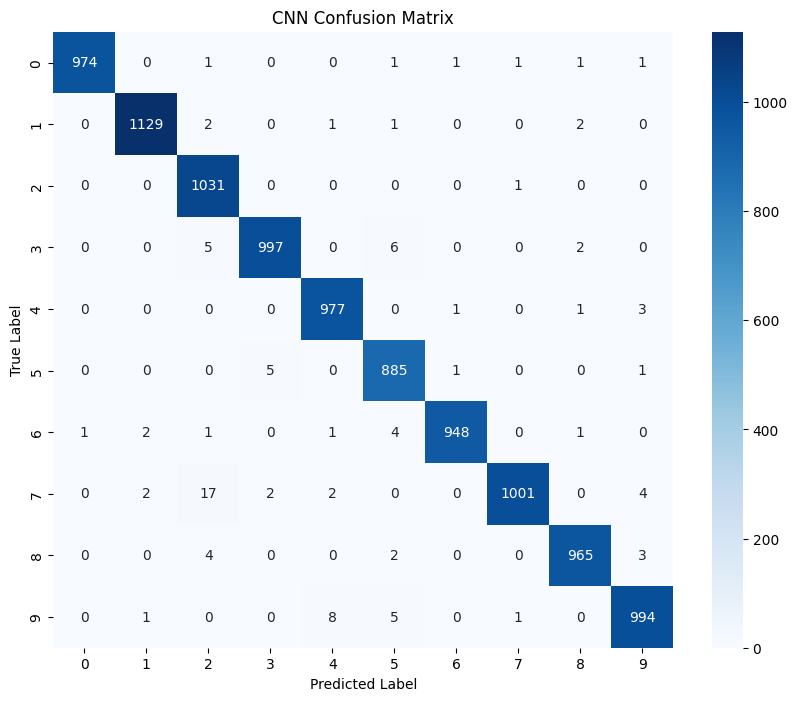

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict classes
y_pred_cnn = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred_cnn, axis=1)
y_true = np.argmax(y_test_cnn, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Confusion Matrix")
plt.show()


Precision, Recall & F1-Score

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.97      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.97      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Visualize Correct & Incorrect Predictions

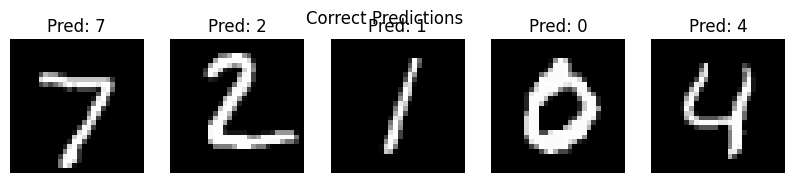

In [14]:
correct_indices = np.where(y_pred_classes == y_true)[0][:5]

plt.figure(figsize=(10,2))
for i, idx in enumerate(correct_indices):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.suptitle("Correct Predictions")
plt.show()


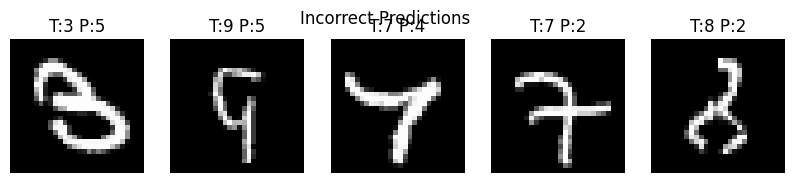

In [15]:
incorrect_indices = np.where(y_pred_classes != y_true)[0][:5]

plt.figure(figsize=(10,2))
for i, idx in enumerate(incorrect_indices):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"T:{y_true[idx]} P:{y_pred_classes[idx]}")
    plt.axis('off')
plt.suptitle("Incorrect Predictions")
plt.show()


In [16]:
model.save("mnist_cnn_model.keras")


In [17]:
import os
os.getcwd()


'/home/njunge-sharon'

In [36]:
pip install streamlit pillow tensorflow


Note: you may need to restart the kernel to use updated packages.


In [1]:
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

# Load model
model = tf.keras.models.load_model("mnist_cnn_model.h5")

st.title("Handwritten Digit Classifier")
st.write("Upload an image of a handwritten digit (0–9)")

uploaded_file = st.file_uploader("Choose an image", type=["png","jpg","jpeg"])

if uploaded_file:
    image = Image.open(uploaded_file).convert("L")
    image = image.resize((28,28))
    img_array = np.array(image) / 255.0
    img_array = img_array.reshape(1,28,28,1)

    prediction = model.predict(img_array)
    digit = np.argmax(prediction)

    st.image(image, caption="Uploaded Image", width=150)
    st.success(f"Predicted Digit: {digit}")


2026-01-09 10:22:20.011193: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-09 10:22:21.389811: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-09 10:22:24.663185: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/home/njunge-sharon/jupyter_env/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
2026-01-09 10:22:28.159182: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN E